<a href="https://colab.research.google.com/github/fabiodemo/Tensorflow-Developer-Certificate/blob/main/Neural%20Network%20Classification/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with TensorFlow

In this notebook, we're going to learn how to write Neural Networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
- Binary classification;
- Multiclass classification;
- Multilabel classification.

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [2]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now, let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


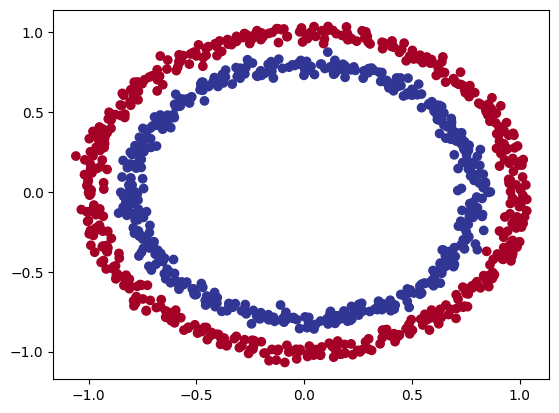

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# Check how many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]
X[25], y[25]

(array([-0.93699411,  0.19944235]), 0)

## Steps in modelling
The steps in moddeling with TensorFlow are tipically:
1. Create a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model


In [9]:
import tensorflow as tf

In [10]:
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 4.1386 - accuracy: 0.4710
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 1.1556 - accuracy: 0.4980
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7260 - accuracy: 0.5020
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7040 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6970 - accuracy: 0.5020


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Trying to improve the model by training it for longer
model_1.fit(X, y, epochs=100, verbose=0)
model_1.evaluate(X,y)
# This approach is wrong, since we're evaluating the same trained data. We should create a training dataset
# But we're working in a "toy problem", so it's okay in this case

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5320


[0.6931854486465454, 0.5320000052452087]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy, it's performing as if it's guessing.

So let's add an extra layer

In [13]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 7.5297 - accuracy: 0.5070
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [14]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [15]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Possible steps to improve the model:
1. Create a model - we might to add more layers or increase the number of hidden units within a layer;
2. Compiling a model - We might to choose a different a different optimization function (such as Adam instead of SGD);
3. Fitting a model - Perhaps we might fit our model for more epochs (leaving it training longer);

In [16]:
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), # Changed to Adam
              metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 4.2581 - accuracy: 0.4280
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 4.1329 - accuracy: 0.4460
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 3.9767 - accuracy: 0.4500
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 3.8521 - accuracy: 0.4500
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 3.8040 - accuracy: 0.4520
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 3.7239 - accuracy: 0.4550
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 3.6187 - accuracy: 0.4550
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 3.5141 - accuracy: 0.4550
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 3.4233 - accuracy: 0.4550
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 3.3139 - accuracy: 0.4550


In [17]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
model_4.fit(X, y, epochs=100, verbose=0)

In [18]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5100


[0.6972125768661499, 0.5099999904632568]

In [19]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               300       
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


To visualize our model's predictions, let's create a function `plot_decision_boundary()`. This function will:

* Take in a trained model, features (X) and label (y);
* Create a meshgrid of the different X values;
* Make predictions across the meshgrid;
* Plot the predicitons as well as a line between zones (where each unique class falls).

In [20]:
import numpy as np

In [21]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [22]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [23]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. madewithml
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # If so, we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


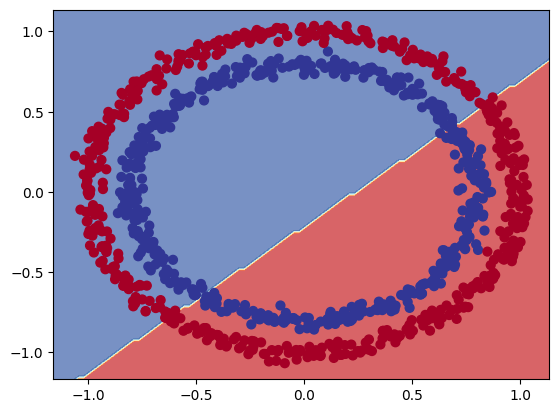

In [24]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [25]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# X_regression, y_regression

# Split our regression data into training and test sets
X_reg_train =  X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [110]:
# Fit our model to the regression
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

We compiled our model for a binary classification problem. 
But now we're working on a regression problem, so let's change the model to suit our data

In [26]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 342.6730 - mae: 342.6730
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 229.3883 - mae: 229.3883
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 118.2800 - mae: 118.2800
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 48.8967 - mae: 48.8967
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 77.4606 - mae: 77.4606
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 65.4346 - mae: 65.4346
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 43.1045 - mae: 43.1045
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 49.6098 - mae: 49.6098
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 41.6451 - mae: 41.6451
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 44.5424 - mae: 44.5424
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


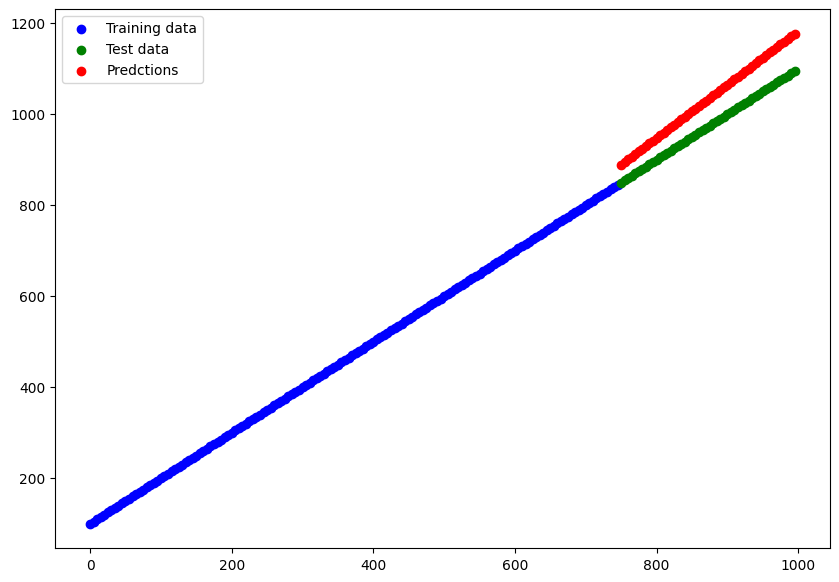

In [27]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's prediction against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predctions")
plt.legend();

# The missing piece: Non-linearity

In [28]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# 2. Compile the moadel
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.4307 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4240 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4160 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4157 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4155 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4152 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4150 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4148 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4146 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4143 - accuracy: 0.4860
Epoch 11/

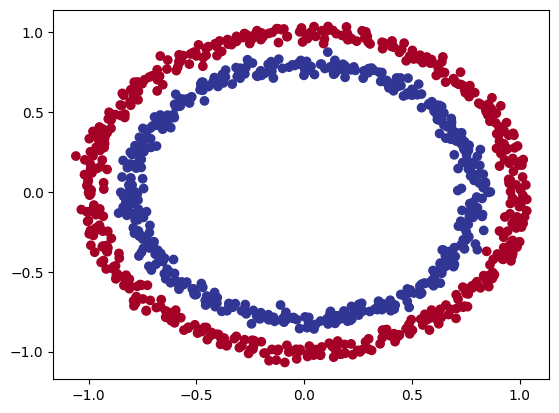

In [29]:
history

# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 1ms/step
doing binary classification


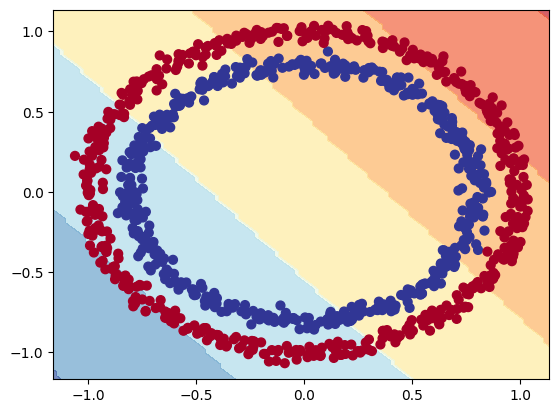

In [30]:
# Checking the decision boundary
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Trying to build the first neural network with a non-linear activation function

In [31]:
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile the moadel
model_5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0179 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9805 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9572 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9541 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9524 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9427 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9221 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9167 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8930 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8901 - accuracy: 0.4810
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


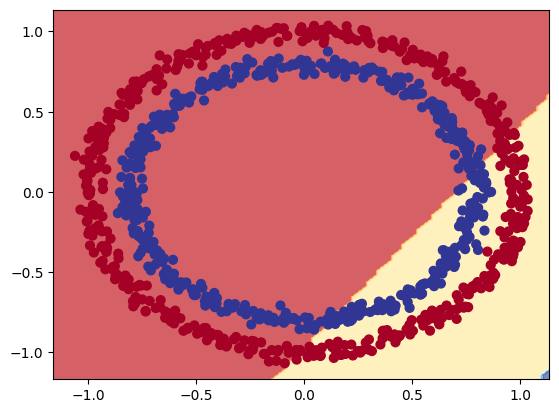

In [32]:
# Checking the decision boundary
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [33]:
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the moadel
model_6.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


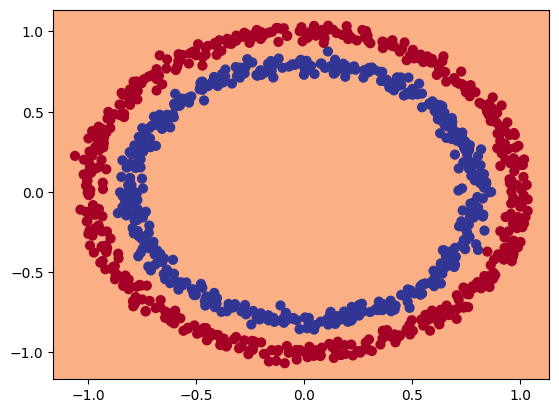

In [34]:
# Checking the decision boundary
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [35]:
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu"),
])

# 2. Compile the moadel
model_7.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.5457 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4487 - accuracy: 0.4610
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1473 - accuracy: 0.4570
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9919 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8050 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.9417 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9977 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9582 - accuracy: 0.4930
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9377 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9200 - accuracy: 0.4950
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


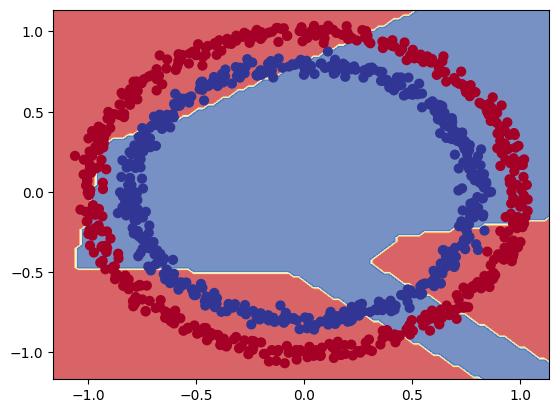

In [36]:
# Checking the decision boundary
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [37]:
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the moadel
model_8.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5060
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5230
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5120
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5330
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5280
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5280
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5360
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5460
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5400
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5410
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


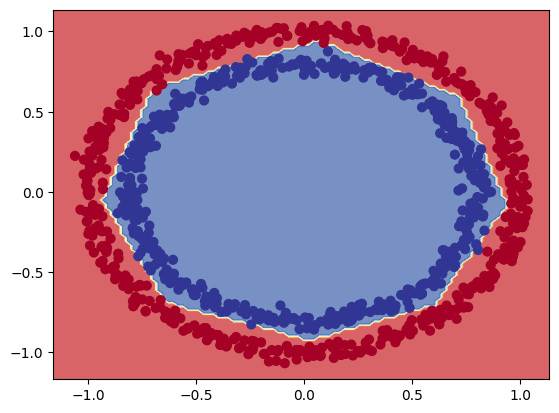

In [38]:
# Checking the decision boundary
plot_decision_boundary(model=model_8,
                       X=X,
                       y=y)

In [39]:
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the moadel
model_9.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_9.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.4980
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5170
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5230
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5230
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5090
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5090
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5070
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5120
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5190
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5180
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing binary classification


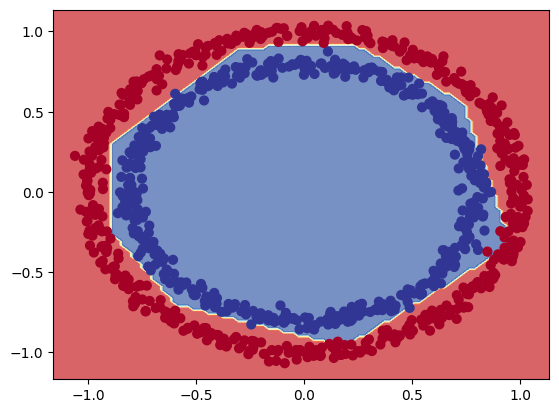

In [40]:
# Checking the decision boundary
plot_decision_boundary(model=model_9,
                       X=X,
                       y=y)

**Note:** The combination of **Linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

In [41]:
# Creating a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

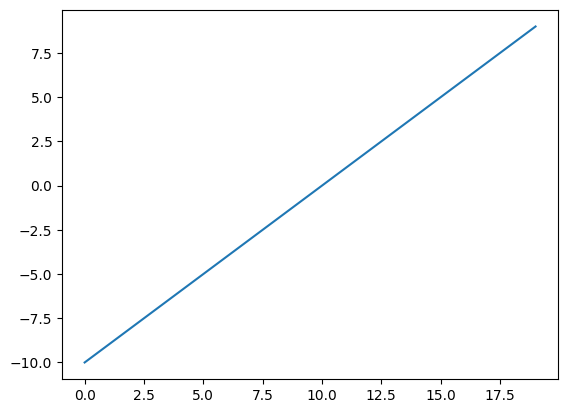

In [42]:
plt.plot(A);

In [43]:
# Let's start by replicating sigmoid = sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

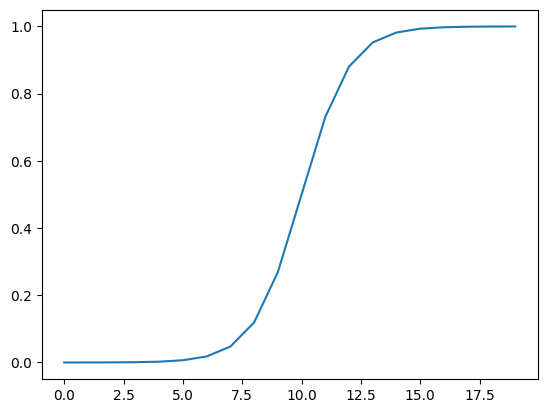

In [44]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [45]:
# Let's recreate ReLU function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

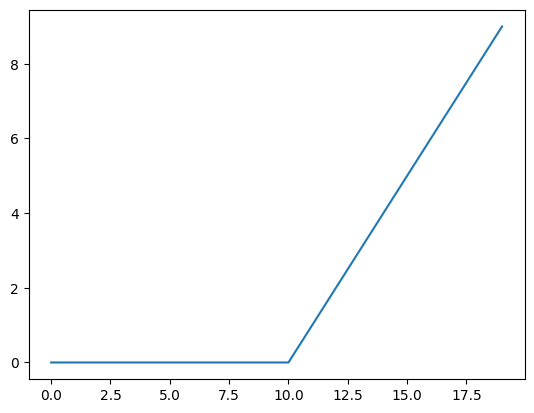

In [46]:
plt.plot(relu(A))

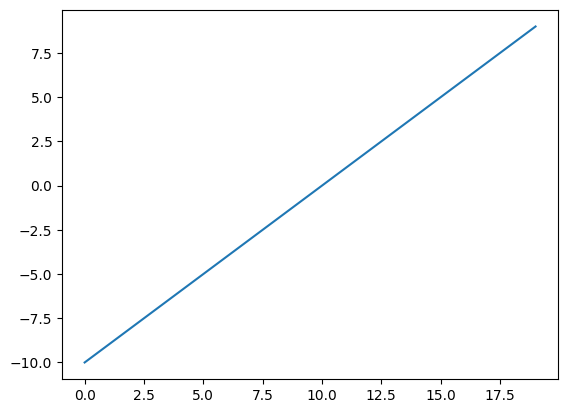

In [47]:
# Linear function doesn't change this input data
plt.plot(tf.keras.activations.linear(A))

In [48]:
A == (tf.keras.activations.linear(A))

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [49]:
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the moadel
model_10.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# 3. Fit the model
history = model_10.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 2s 4ms/step - loss: 0.7020 - accuracy: 0.4970
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.4850
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4660
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4310
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4510
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 11/20
32/32 [

## Evaluating and improving our classification

Sor far we've been training and testing on the same dataset

However, in machine learning this is basically a sin.

So let's create a training dataset.

In [50]:
len(X)

1000

In [51]:
# Split into train and test
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((800, 2), (200, 2), (800,), (200,))

In [52]:
# Let's recreate a model to fit on the training data and evaluate on the testing dataset

tf.random.set_seed(42)

# 1. Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the moadel
model_11.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics=["accuracy"])

# 3. Fit the model
history = model_11.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6985 - accuracy: 0.4975
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4925
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4925
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4963
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5050
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.4938
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5125
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5375
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5475
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5537
Epoch 11/50
25/25 [

313/313 [==============================] - 1s 1ms/step
doing binary classification


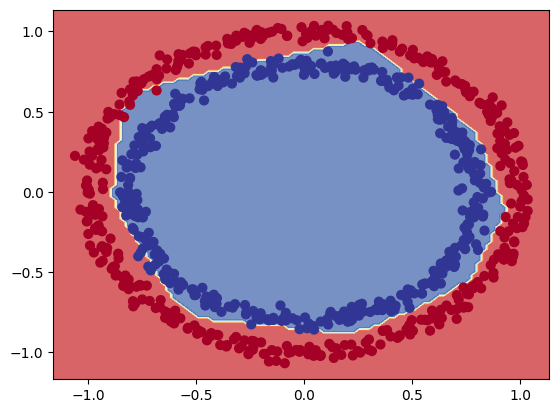

In [53]:
plot_decision_boundary(model=model_11,
                       X=X_train,
                       y=y_train)

In [54]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.9850


[0.4379742741584778, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


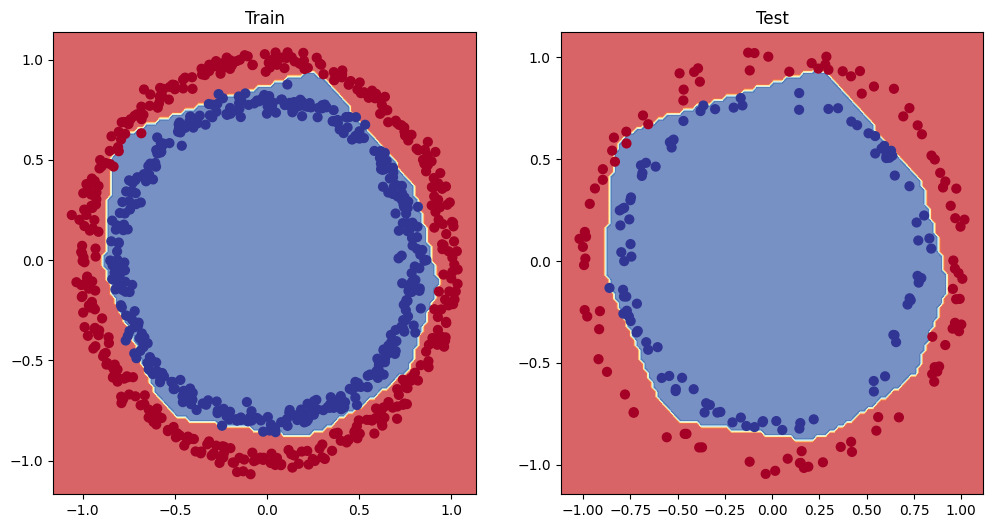

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_11,
                       X=X_train,
                       y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_11,
                       X=X_test,
                       y=y_test)
plt.show();

## Plot the loss (or training) curves

In [56]:
history.history

{'loss': [0.698453426361084,
  0.6958119869232178,
  0.6937877535820007,
  0.6923214793205261,
  0.6911676526069641,
  0.6901512742042542,
  0.6888580918312073,
  0.6881220936775208,
  0.6868686079978943,
  0.6857105493545532,
  0.6846538782119751,
  0.6836055517196655,
  0.6821385025978088,
  0.6806103587150574,
  0.6793654561042786,
  0.6773731708526611,
  0.6757473945617676,
  0.6734467148780823,
  0.6715995073318481,
  0.6691081523895264,
  0.6663333773612976,
  0.662955105304718,
  0.6601821780204773,
  0.6565567851066589,
  0.6525301933288574,
  0.6482614278793335,
  0.6431266069412231,
  0.6358541250228882,
  0.6297004818916321,
  0.6226000785827637,
  0.6155036687850952,
  0.6081526279449463,
  0.6006831526756287,
  0.5932683348655701,
  0.5857256054878235,
  0.5771406292915344,
  0.5680468678474426,
  0.5604037642478943,
  0.5508622527122498,
  0.5411024689674377,
  0.5311574935913086,
  0.5204721093177795,
  0.5101941227912903,
  0.49879956245422363,
  0.4877525269985199,
  0

In [57]:
# Convert the history object into a Dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.698453,0.49750
1,0.695812,0.49250
2,0.693788,0.49250
3,0.692321,0.49625
4,0.691168,0.50500
5,0.690151,0.49375
6,0.688858,0.51250
7,0.688122,0.53750
8,0.686869,0.54750
9,0.685711,0.55375


Text(0.5, 1.0, 'Model_8 loss curves')

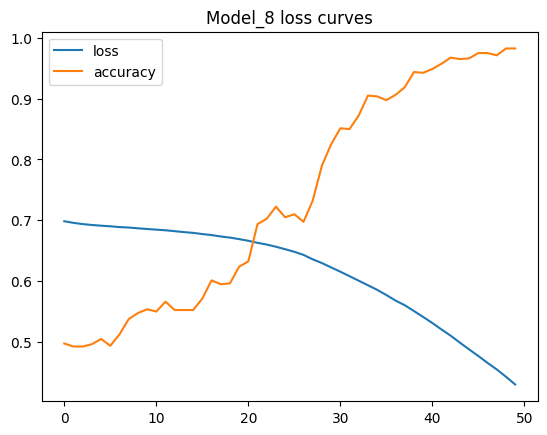

In [58]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the Learning Rate Decay

To find the learning rate decay (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - an extra piece of functionality, that can be added to *while* its training;
* Another model (we could use the same on as above, but we're practicing building models);
* A modified loss curve plot.

In [59]:
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_12.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10 ** (epoch/20))

# Fit the model (passing lr_scheduler callback)
history_12 = model_12.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7179 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7161 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7143 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7123 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7057 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7034 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

<Axes: xlabel='epochs'>

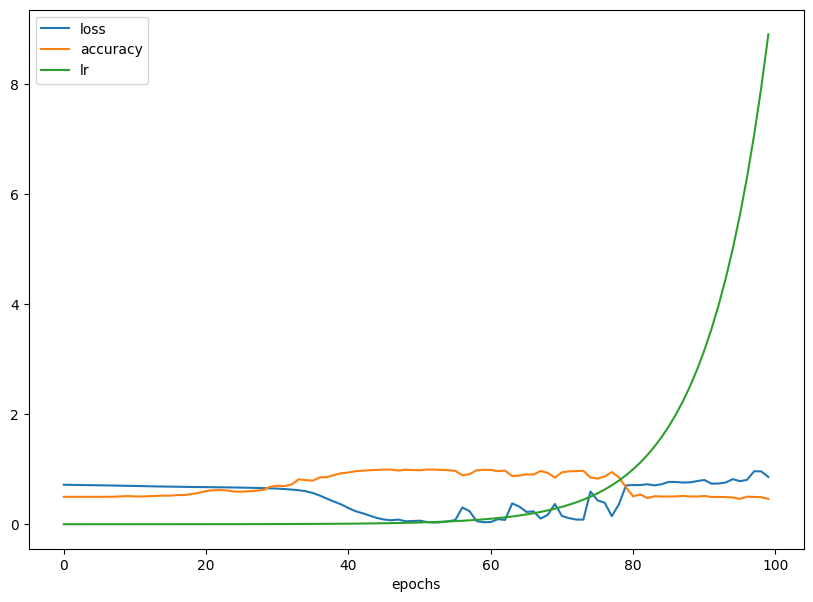

In [60]:
# Check the history
pd.DataFrame(history_12.history).plot(figsize=(10,7), xlabel="epochs") 

Text(0.5, 1.0, 'Learning Rate vs Loss')

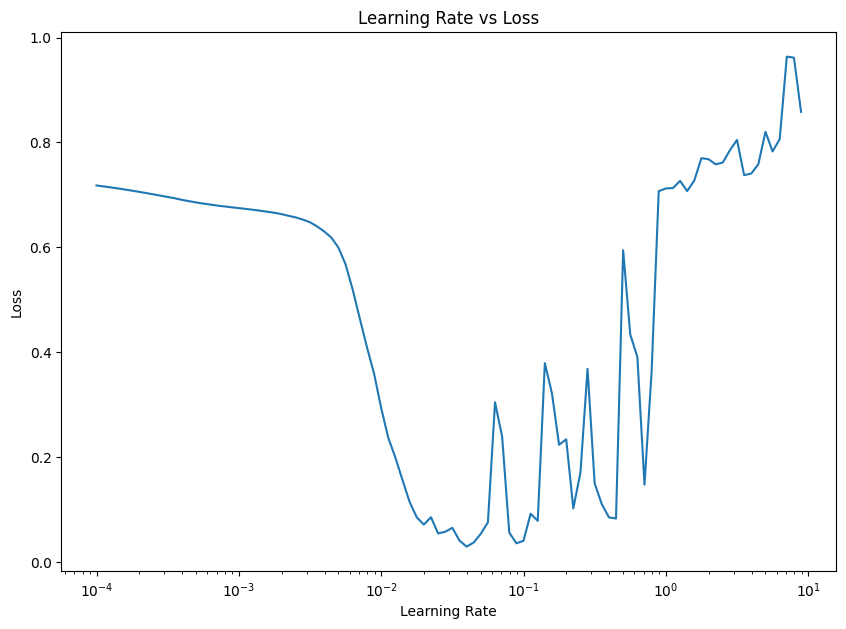

In [61]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
# lrs
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_12.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [62]:
len(lrs)

100

In [63]:
# Let's recreate a model to fit on the training data and evaluate on the testing dataset
tf.random.set_seed(42)

# 1. Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the moadel
model_13.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# 3. Fit the model
history = model_13.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6893 - accuracy: 0.5113
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5675
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.5850
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6963
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.6963
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7200
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7613
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8800
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.9450
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9663
Epoch 11/50
25/25 [

In [64]:
# Evaluate model 13 on the dataset
model_13.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9950


[0.0190633125603199, 0.9950000047683716]

In [65]:
# Evaluate model 11 on the dataset
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.9850


[0.4379742741584778, 0.9850000143051147]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


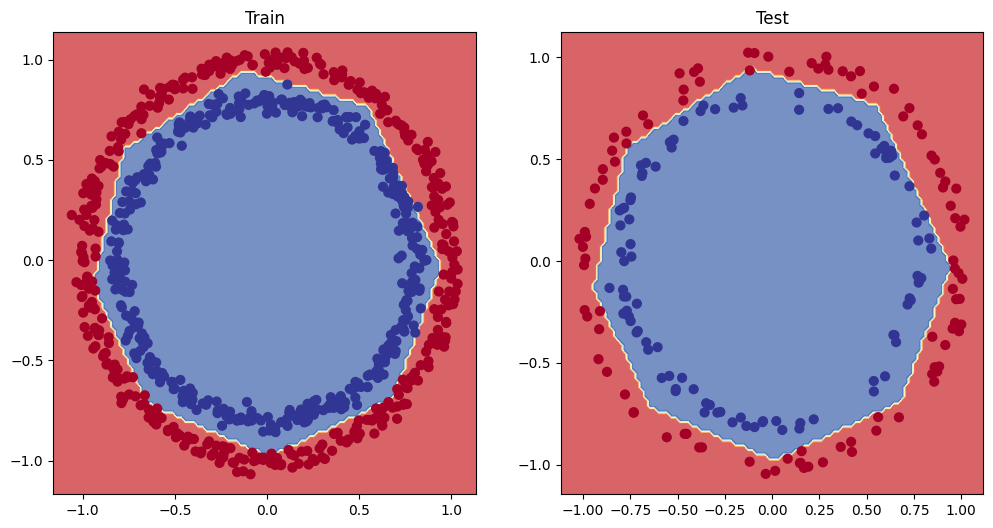

In [66]:
# Plot the decision boundaries for the training and test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_13,
                       X=X_train,
                       y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_13,
                       X=X_test,
                       y=y_test)
plt.show();

## Classification Evaluation Methods

Some classification evaluation methods & metrics:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification report (from scikit-learn)

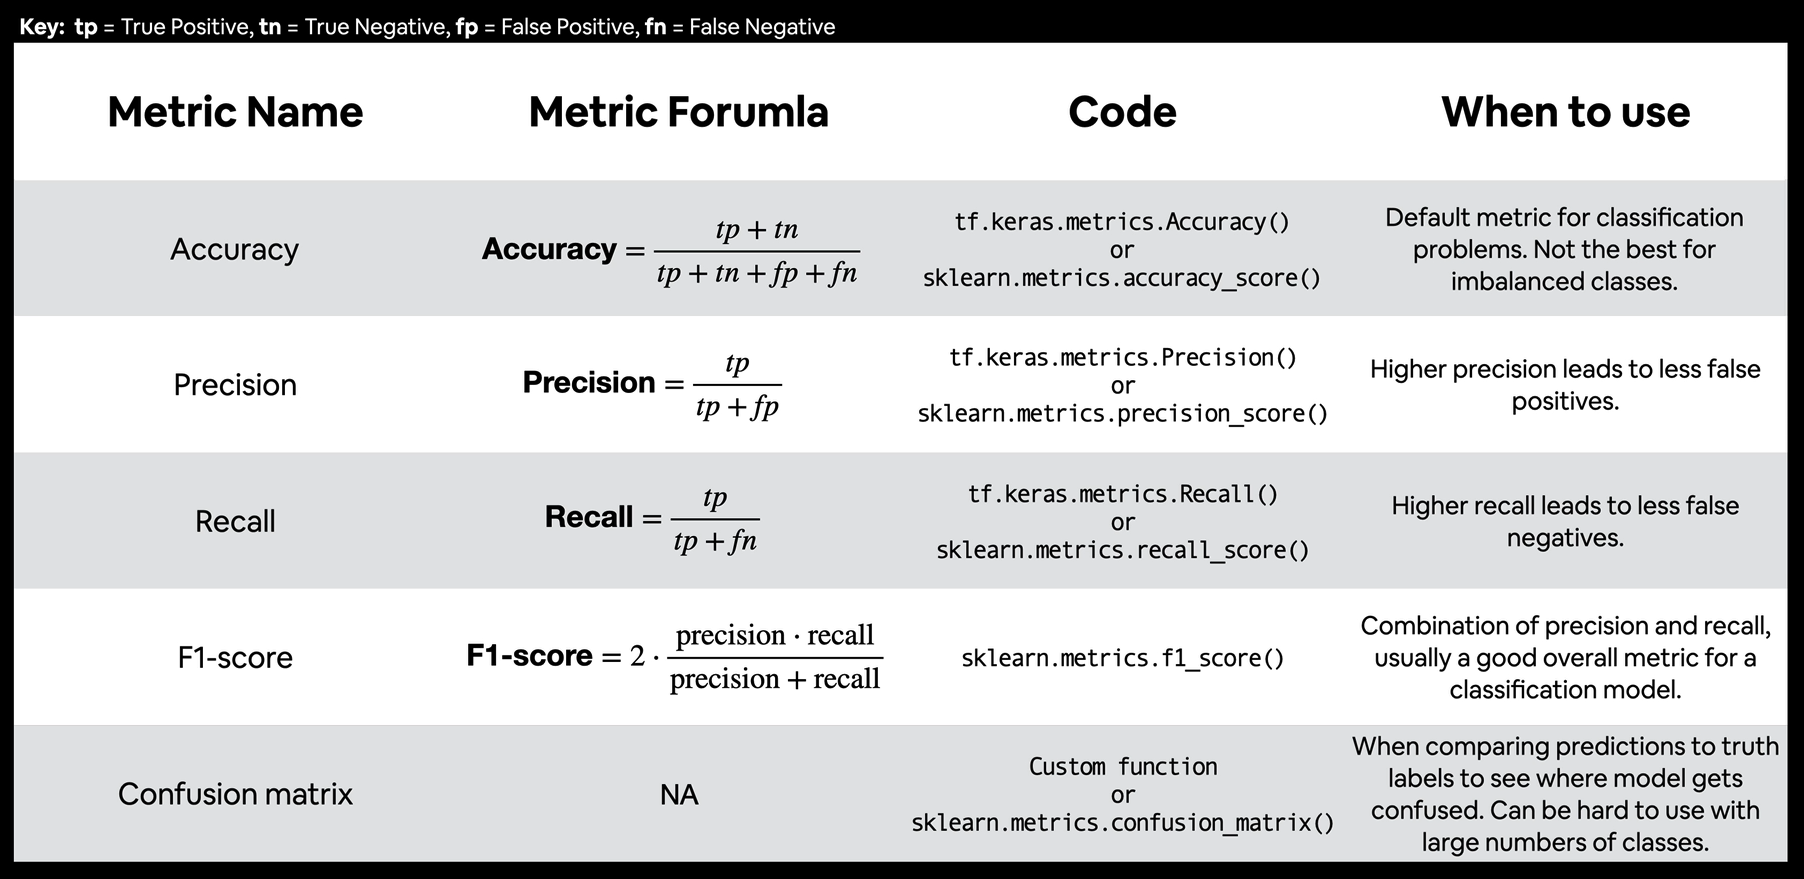

In [67]:
# Check accuracy of our model
loss, accuracy = model_13.evaluate(X_test, y_test)
print(f"Model loss on the thest set: {loss}\n Model accuracy on the thest set: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9950
Model loss on the thest set: 0.0190633125603199
 Model accuracy on the thest set: 99.50%


In [72]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_13.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds) # Classification metrics can't handle a mix of binary and continuous targets
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[100,   1],
       [  0,  99]])

In [69]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[9.7763294e-01],
        [9.9997061e-01],
        [9.9986476e-01],
        [9.9977803e-01],
        [3.7756301e-02],
        [1.4577236e-05],
        [9.9974364e-01],
        [4.6552464e-05],
        [9.8869181e-01],
        [1.9038720e-05]], dtype=float32))

looks like `y_preds` has come out in **prediction probability** form... The standard output from the sigmoid (or softmax) activation functions.

In [70]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

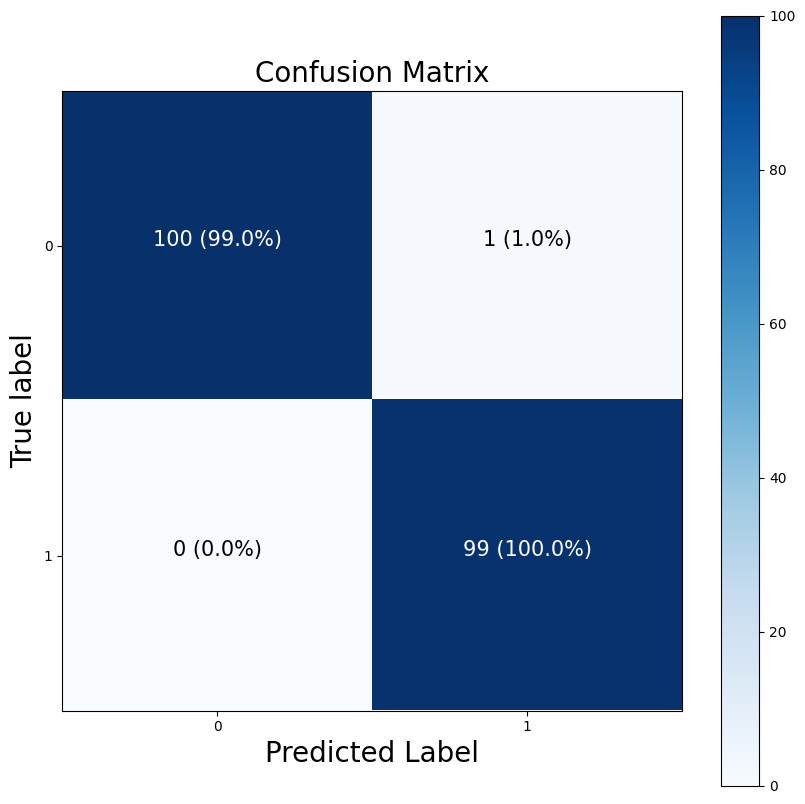

In [82]:
# Let's prettify the confusion matrix
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize = figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = n_classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [74]:
cm_norm

array([[0.99009901, 0.00990099],
       [0.        , 1.        ]])

In [83]:
# Creating function to plot confusion matrix
def plot_confusion_matrix(y_preds, y_test):
  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = n_classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

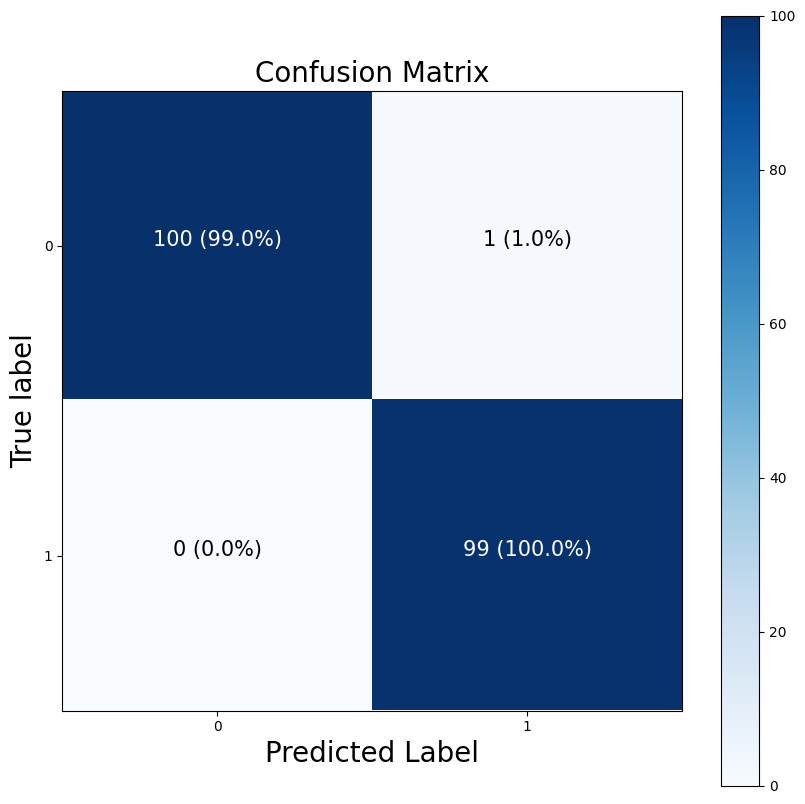

In [84]:
plot_confusion_matrix(y_preds=y_preds, y_test=y_test)

# Multiclass Classification - Working with a larger example

When you have more than two classes as an option, it's known as **multi-class classification**

In [85]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [86]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [88]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}")
# Show the first training example
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [89]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

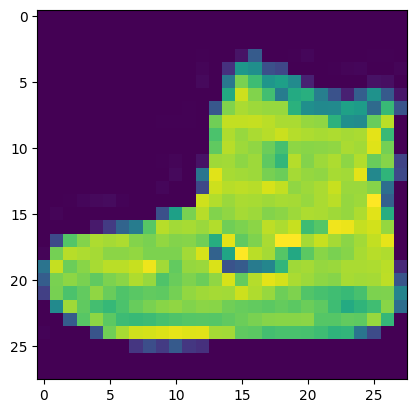

In [90]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])